In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
matplotlib.rc('font', family='AppleGothic')
matplotlib.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

pd.options.display.max_rows=100
pd.options.display.max_columns=100
pd.set_option('display.float_format','{:.4f}'.format)

In [257]:
# rawdata = pd.read_csv('./data/rawdata.csv', index_col=0)

In [258]:
# rawdata.head(1)

### rawdata 에서 rawdata2(final df)로 변환된 것들
- 데이터 컬럼 순서 변경
- realse_price 스타피쉬 추가
- location, location2, update_time 컬럼 제거
- date 2020-11부터
- 데이터타입 변경 (price int로 변경)

In [259]:
rawdata2 = pd.read_csv('./data/rawdata.csv', index_col = 0)

### 데이터 오류 수정

In [260]:
data = rawdata2.copy()

In [261]:
# data = rawdata.copy()

In [262]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7621 entries, 0 to 517
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location       6767 non-null   object 
 1   name           7621 non-null   object 
 2   num_faved      7621 non-null   int64  
 3   pid            7621 non-null   int64  
 4   price          7621 non-null   int64  
 5   status         7621 non-null   int64  
 6   uid            7621 non-null   int64  
 7   update_time    7621 non-null   int64  
 8   used           7621 non-null   int64  
 9   datetime       7621 non-null   object 
 10  date           7621 non-null   object 
 11  product_name   7621 non-null   object 
 12  brand          7621 non-null   object 
 13  product_type   7621 non-null   object 
 14  color          7621 non-null   object 
 15  size           7621 non-null   int64  
 16  release_price  7368 non-null   float64
 17  location1      7621 non-null   object 
 18  location2

In [268]:
data['date'] = pd.to_datetime(data['date'])

In [269]:
data.describe()

,num_faved,pid,price,status,uid,update_time,used,size,release_price
count,7621.0000,7621.0000,7621.0000,7621.0000,7621.0000,7621.0000,7621.0000,7621.0000,7368.0000
mean,3.7014,164168419.9009,950149.6314,2.0304,16722285.1138,1632673225.7074,1.7782,259.8683,167186.0749
std,7.3402,6221559.8116,23312674.6126,1.3711,25918840.9442,5288320.3695,1.9785,23.3860,55940.5049
min,0.0000,58389321.0000,0.0000,0.0000,6898.0000,1481413623.0000,1.0000,0.0000,119000.0000
25%,0.0000,162929043.0000,229000.0000,0.0000,3066051.0000,1631030903.0000,1.0000,245.0000,119000.0000
50%,2.0000,165839043.0000,290000.0000,3.0000,6189842.0000,1633917947.0000,1.0000,265.0000,139000.0000
75%,4.0000,168115407.0000,343500.0000,3.0000,11415856.0000,1636080782.0000,2.0000,275.0000,199000.0000
max,199.0000,169635724.0000,999999999.0000,3.0000,77860633.0000,1636633662.0000,13.0000,330.0000,259000.0000


In [270]:
data.columns

Index(['location', 'name', 'num_faved', 'pid', 'price', 'status', 'uid',
       'update_time', 'used', 'datetime', 'date', 'product_name', 'brand',
       'product_type', 'color', 'size', 'release_price', 'location1',
       'location2', 'location3'],
      dtype='object')

## 데이터 정제

### abnormal_price 추가
- 시세 추이 확인을 위함
- 만원 이하의 제품은 새로운 컬럼에 표시해준다
- 너무 비싼 가격은 새로운 컬럼에 표시해준다
- 1000으로 나눠서 떨어지지않는, 비정상적인 가격은 새로운 컬럼에 넣는다.

In [271]:
set(data['price'])

{0,
 100,
 111,
 123,
 222,
 333,
 350,
 666,
 777,
 1000,
 1004,
 1111,
 1234,
 2000,
 2021,
 2222,
 2345,
 3000,
 3333,
 3900,
 5000,
 5555,
 7777,
 8989,
 9999,
 10000,
 11111,
 12345,
 15000,
 20000,
 22222,
 25000,
 30000,
 32000,
 39000,
 40000,
 45000,
 49000,
 50000,
 55000,
 59000,
 60000,
 65000,
 68000,
 70000,
 72000,
 75000,
 77777,
 79000,
 80000,
 85000,
 87000,
 89000,
 90000,
 95000,
 98000,
 99000,
 99999,
 100000,
 105000,
 110000,
 111111,
 115000,
 117000,
 117500,
 119000,
 120000,
 122500,
 123000,
 123456,
 125000,
 129000,
 130000,
 132000,
 133000,
 135000,
 138000,
 139000,
 140000,
 142000,
 143000,
 144000,
 145000,
 147000,
 148000,
 149000,
 150000,
 154000,
 155000,
 156000,
 158000,
 159000,
 160000,
 163000,
 164000,
 165000,
 167000,
 168000,
 169000,
 170000,
 171000,
 173000,
 175000,
 176000,
 178000,
 179000,
 180000,
 182000,
 183000,
 184000,
 185000,
 188000,
 189000,
 190000,
 193000,
 194000,
 195000,
 196000,
 197000,
 199000,
 200000,
 2030

In [272]:
data[data['price'] == 30000000]

,location,name,num_faved,pid,price,status,uid,update_time,used,datetime,date,product_name,brand,product_type,color,size,release_price,location1,location2,location3
2589,경기도 고양시 일산동구 백석1동,새상품 나이키 덩크로우 범고래 240 우먼스,3,168355147,30000000,3,3953933,1635820571,1,2021-11-02 11:36:11,2021-11-02,나이키 덩크로우 범고래,나이키,나이키 덩크로우,범고래,240,119000.0000,경기도,고양시,일산동구 백석1동


In [273]:
# 함수로 만들어서 boolean 적용
# 1000으로 나누어떨어지지 않는 Price는 비정상적인 가격
# 10000보다 낮은 가격은 비정상적인 가격
# 5000000보다 높은 가격은 비정상적인 가격
def make_bool(x):
    if x % 1000 != 0:
        return True
    elif x < 10000:
        return True
    elif x > 5000000:
        return True
    else:
        return False

In [274]:
data['abnormal_price'] = data['price'].apply(make_bool)

In [275]:
normal_price = data[data['abnormal_price'] == False].reset_index(drop=True)

In [276]:
normal_price['price'].describe()

count      7250.0000
mean     311565.9310
std      195064.7359
min       10000.0000
25%      240000.0000
50%      300000.0000
75%      349000.0000
max     3590000.0000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

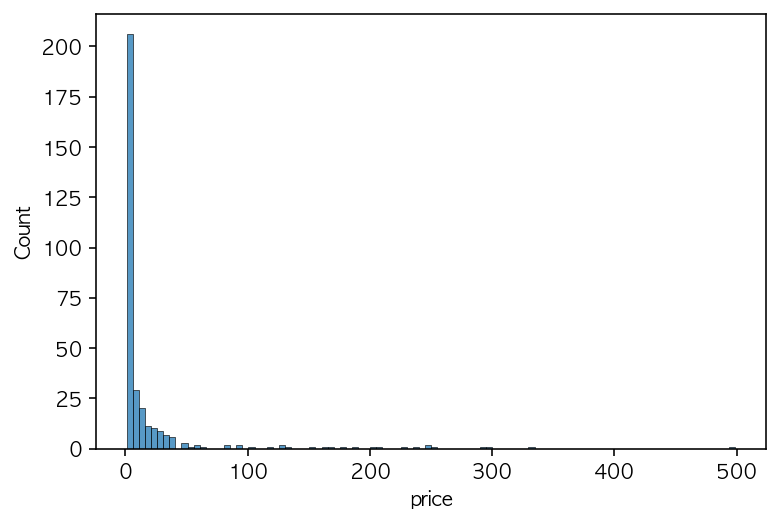

In [277]:
sns.histplot(normal_price['price'].value_counts(), bins=100)

## EDA

In [278]:
normal_price.columns

Index(['location', 'name', 'num_faved', 'pid', 'price', 'status', 'uid',
       'update_time', 'used', 'datetime', 'date', 'product_name', 'brand',
       'product_type', 'color', 'size', 'release_price', 'location1',
       'location2', 'location3', 'abnormal_price'],
      dtype='object')

### dunklow

In [378]:
# 나이키 덩크로우만 뽑아오기
dunklow = normal_price[normal_price['product_type'] == '나이키 덩크로우'].reset_index(drop=True)
print(dunklow.shape)
dunklow.head(1)

(2728, 21)


,location,name,num_faved,pid,price,status,uid,update_time,used,datetime,date,product_name,brand,product_type,color,size,release_price,location1,location2,location3,abnormal_price
0,NaN,나이키 덩크로우 코스트 265,3,163073084,300000,0,1336659,1636627930,1,2021-11-11 19:52:10,2021-11-11,나이키 덩크로우 코스트,나이키,나이키 덩크로우,코스트,265,119000.0000,NUL,NUL,NaN,False


In [379]:
# # 덩크로우 중고상품만 뽑아오기
# dunklow = dunklow[(dunklow['used'] == 1) | (dunklow['used'] == 13)].reset_index(drop=True)
# 덩크로우 새상품만 뽑아오기
dunklow = dunklow[dunklow['used'] == 2].reset_index(drop=True)
print(dunklow.shape)
dunklow.head(1)

(1247, 21)


,location,name,num_faved,pid,price,status,uid,update_time,used,datetime,date,product_name,brand,product_type,color,size,release_price,location1,location2,location3,abnormal_price
0,서울특별시 동대문구 용신동,[W230.240.245.250] 나이키 덩크로우 코스트,18,158642585,400000,0,3785172,1636618230,2,2021-11-11 17:10:30,2021-11-11,나이키 덩크로우 코스트,나이키,나이키 덩크로우,코스트,230,119000.0000,서울특별시,동대문구,용신동,False


In [380]:
test = pd.pivot_table(dunklow, index='date', columns='color', values='price', aggfunc=['median','mean','count'])
test

median                                                  \
color             골든로드        라이트본       바시티그린         범고래     유니버시티블루   
date                                                                     
2021-01-02         NaN         NaN         NaN 500000.0000         NaN   
2021-01-04         NaN         NaN         NaN 230000.0000         NaN   
2021-01-06         NaN         NaN         NaN 400000.0000         NaN   
2021-01-07         NaN         NaN         NaN         NaN         NaN   
2021-01-08         NaN         NaN         NaN 330000.0000         NaN   
...                ...         ...         ...         ...         ...   
2021-11-07 145000.0000 274500.0000         NaN 300000.0000 302500.0000   
2021-11-08 152500.0000 300000.0000         NaN 305000.0000         NaN   
2021-11-09 165000.0000 245000.0000         NaN 310000.0000         NaN   
2021-11-10 150000.0000 279500.0000 429000.0000 310000.0000 360000.0000   
2021-11-11 147500.0000 282500.0000 440000.0000 310000.0000 330000.0000   

                              mean                                      \
color              코스트        골든로드        라이트본       바시티그린         범고래   
date                                                                     
2021-01-02         NaN         NaN         NaN         NaN 500000.0000   
2021-01-04         NaN         NaN         NaN         NaN 230000.0000   
2021-01-06 400000.0000         NaN         NaN         NaN 400000.0000   
2021-01-07 390000.0000         NaN         NaN         NaN         NaN   
2021-01-08 420000.0000         NaN         NaN         NaN 330000.0000   
...                ...         ...         ...         ...         ...   
2021-11-07 379500.0000 145000.0000 274500.0000         NaN 306394.7368   
2021-11-08 315000.0000 152500.0000 300000.0000         NaN 314945.9459   
2021-11-09         NaN 163166.6667 253333.3333         NaN 317239.1304   
2021-11-10 369500.0000 155555.5556 283166.6667 429000.0000 323594.5946   
2021-11-11 400000.0000 156400.0000 289285.7143 440833.3333 312870.5036   

                                     count                                  \
color          유니버시티블루         코스트    골든로드    라이트본  바시티그린      범고래 유니버시티블루   
date                                                                         
2021-01-02         NaN         NaN     NaN     NaN    NaN   1.0000     NaN   
2021-01-04         NaN         NaN     NaN     NaN    NaN   1.0000     NaN   
2021-01-06         NaN 400000.0000     NaN     NaN    NaN   1.0000     NaN   
2021-01-07         NaN 390000.0000     NaN     NaN    NaN      NaN     NaN   
2021-01-08         NaN 420000.0000     NaN     NaN    NaN   1.0000     NaN   
...                ...         ...     ...     ...    ...      ...     ...   
2021-11-07 302500.0000 379500.0000  2.0000  2.0000    NaN  38.0000  2.0000   
2021-11-08         NaN 315000.0000  2.0000  1.0000    NaN  37.0000     NaN   
2021-11-09         NaN         NaN  6.0000  3.0000    NaN  46.0000     NaN   
2021-11-10 360000.0000 362625.0000  9.0000  6.0000 1.0000  74.0000  1.0000   
2021-11-11 323222.2222 370000.0000 10.0000 14.0000 6.0000 139.0000  9.0000   

                   
color         코스트  
date               
2021-01-02    NaN  
2021-01-04    NaN  
2021-01-06 1.0000  
2021-01-07 2.0000  
2021-01-08 1.0000  
...           ...  
2021-11-07 2.0000  
2021-11-08 2.0000  
2021-11-09    NaN  
2021-11-10 8.0000  
2021-11-11 5.0000  

[175 rows x 18 columns]

In [381]:
test.columns

MultiIndex([('median',    '골든로드'),
            ('median',    '라이트본'),
            ('median',   '바시티그린'),
            ('median',     '범고래'),
            ('median', '유니버시티블루'),
            ('median',     '코스트'),
            (  'mean',    '골든로드'),
            (  'mean',    '라이트본'),
            (  'mean',   '바시티그린'),
            (  'mean',     '범고래'),
            (  'mean', '유니버시티블루'),
            (  'mean',     '코스트'),
            ( 'count',    '골든로드'),
            ( 'count',    '라이트본'),
            ( 'count',   '바시티그린'),
            ( 'count',     '범고래'),
            ( 'count', '유니버시티블루'),
            ( 'count',     '코스트')],
           names=[None, 'color'])

In [382]:
test['median'].columns[0]

'골든로드'

In [383]:
# 날짜 범위 만들기
import datetime

start_date = pd.to_datetime('2020-11-11')
end_date = pd.to_datetime('2021-11-11')
date_range_list = pd.date_range(start_date, end_date, periods=10)
date_range_list = [x.strftime("%Y-%m-%d") for x in date_range_list]

In [384]:
xlim_list = ['2021-05-01', '2021-11-11']
pd.to_datetime(xlim_list)

DatetimeIndex(['2021-05-01', '2021-11-11'], dtype='datetime64[ns]', freq=None)

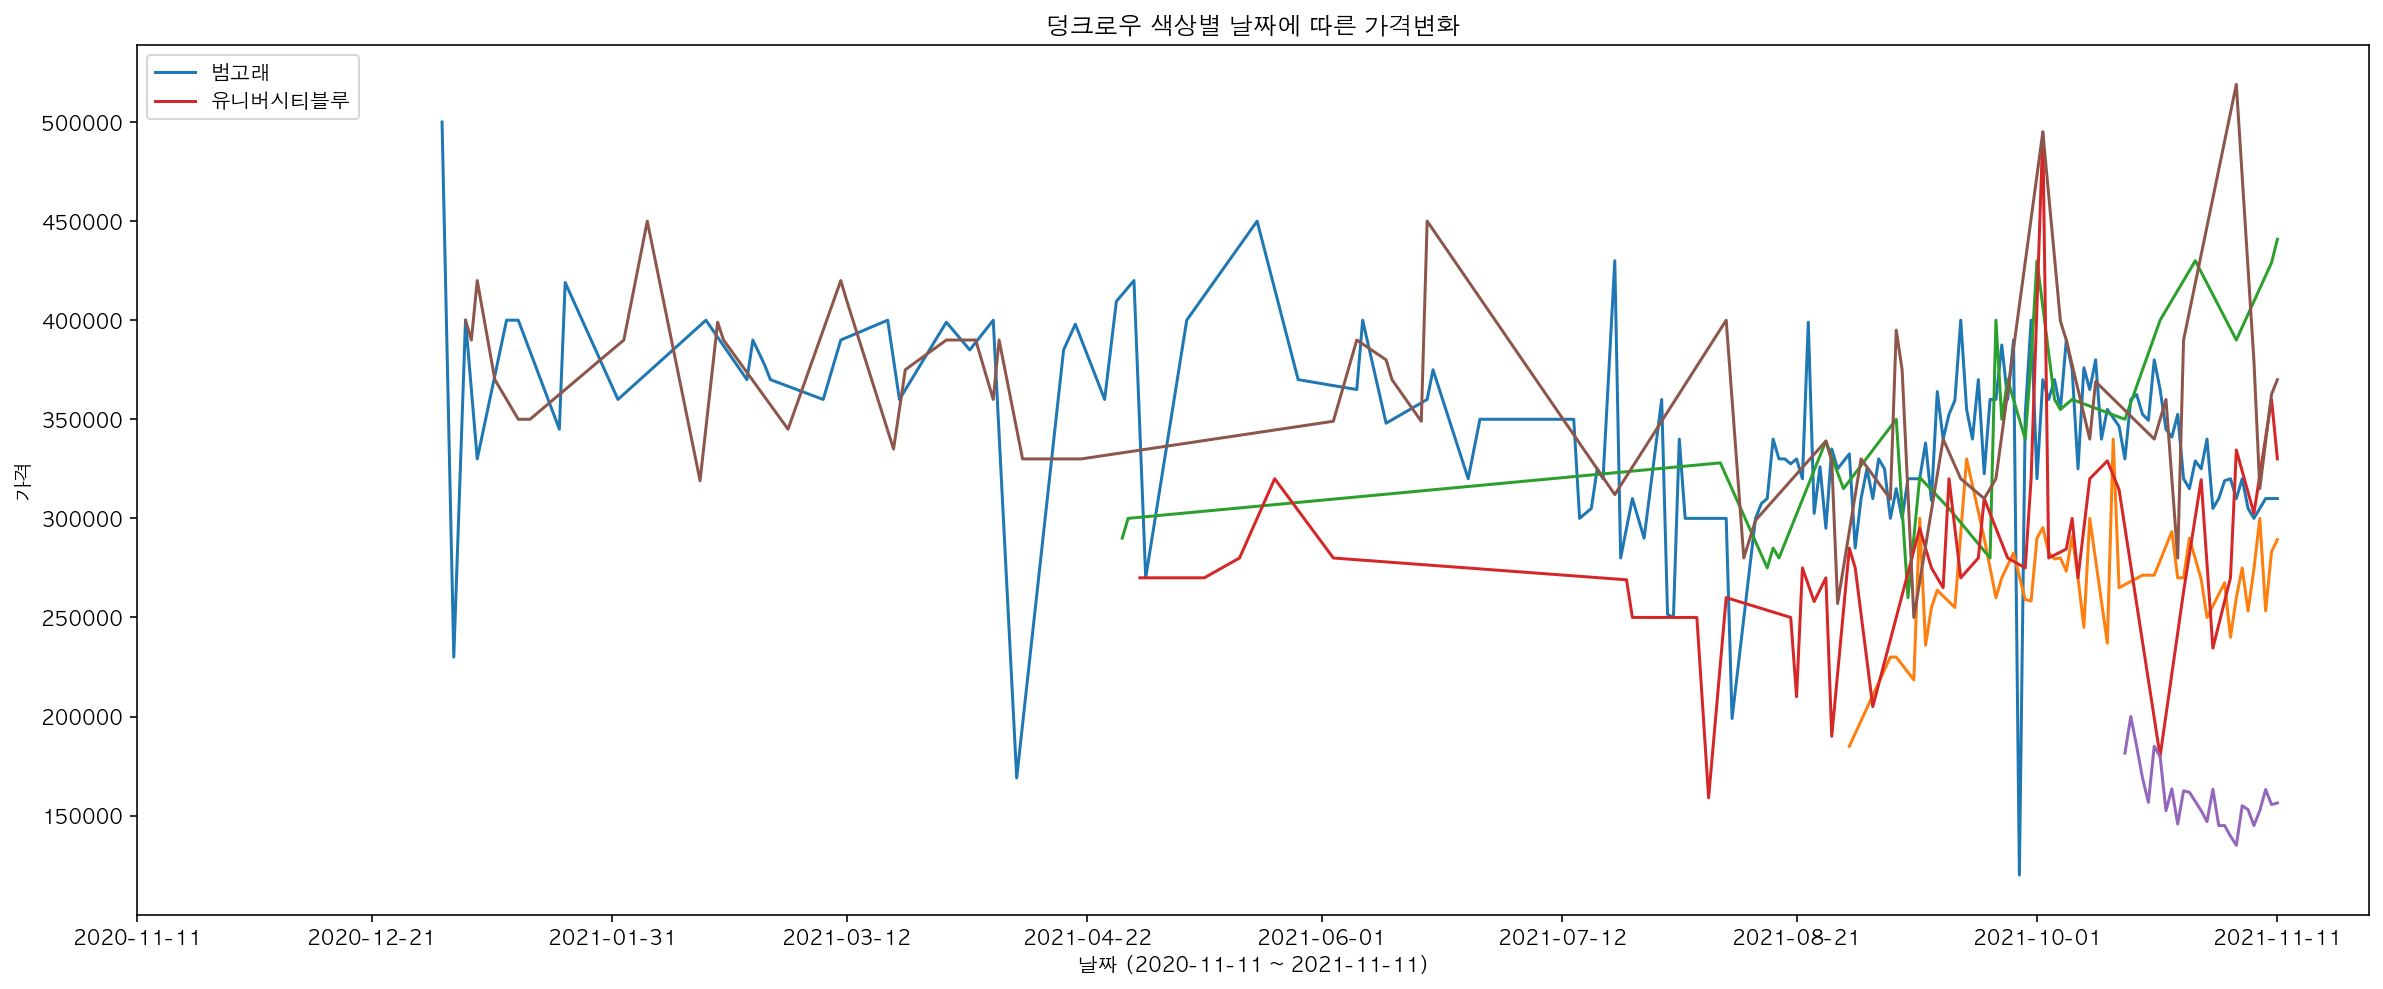

In [396]:
# median을 사용하는 이유는 이상치의 영향을 덜 받기 때문.
xlim_list = pd.to_datetime(['2021-05-01', '2021-11-11'])

plt.figure(figsize=(20,8))
sns.lineplot(data=test, x=test.index, y=test['median', '범고래'], label='범고래')
sns.lineplot(data=test, x=test.index, y=test['mean', '라이트본'])
sns.lineplot(data=test, x=test.index, y=test['mean', '바시티그린'])
sns.lineplot(data=test, x=test.index, y=test['median', '유니버시티블루'], label='유니버시티블루')
sns.lineplot(data=test, x=test.index, y=test['mean', '골든로드'])
sns.lineplot(data=test, x=test.index, y=test['mean', '코스트'])
plt.title('덩크로우 색상별 날짜에 따른 가격변화')
plt.xlabel('날짜 (2020-11-11 ~ 2021-11-11)')
plt.ylabel('가격')
plt.xticks(date_range_list, rotation=0)
# plt.ylim([100000,500000])
# plt.xlim(xlim_list)
plt.legend()
plt.show()

In [395]:
data['product_type'].value_counts().sort_index()

나이키 덩크로우    2874
나이키 덩크하이     572
뉴발란스 992    1599
뉴발란스 993     350
조던 1 로우      518
조던1 미드       691
조던1 하이      1017
Name: product_type, dtype: int64

In [236]:
dunklow_price.index

MultiIndex([('2021-01-02',     '범고래'),
            ('2021-01-04',     '범고래'),
            ('2021-01-06',     '범고래'),
            ('2021-01-06',     '코스트'),
            ('2021-01-07',     '범고래'),
            ('2021-01-07',     '코스트'),
            ('2021-01-08',     '범고래'),
            ('2021-01-08',     '코스트'),
            ('2021-01-11',     '코스트'),
            ('2021-01-13',     '범고래'),
            ...
            ('2021-11-10',   '바시티그린'),
            ('2021-11-10',     '범고래'),
            ('2021-11-10', '유니버시티블루'),
            ('2021-11-10',     '코스트'),
            ('2021-11-11',    '골든로드'),
            ('2021-11-11',    '라이트본'),
            ('2021-11-11',   '바시티그린'),
            ('2021-11-11',     '범고래'),
            ('2021-11-11', '유니버시티블루'),
            ('2021-11-11',     '코스트')],
           names=['date', 'color'], length=520)

In [397]:
pd.DataFrame([1,2,3,4,5])

,0
0,1
1,2
2,3
3,4
4,5


In [402]:
from scipy.stats import trim_mean
trim_mean(pd.DataFrame([1,2,3,4,5])[0], 0.1) # 양쪽에서 10%날림

3.0

### price 컬럼

### 데이터 분석에 사용할 컬럼

In [ ]:
columns = [ "uid", "brand", "product_name","product_type", "color" , "size" ,"price", "datetime", "date", "release_price","location1" ,"location2","status","used"]

In [ ]:
data[columns]

### 뉴발란스

In [17]:
newbal = data[data['brand'] == '뉴발란스']

In [18]:
newbal[newbal['price'].isnull()]

,location,name,num_faved,pid,price,status,uid,update_time,used,datetime,date,product_name,brand,product_type,color,size,release_price,location1,location2,location3
